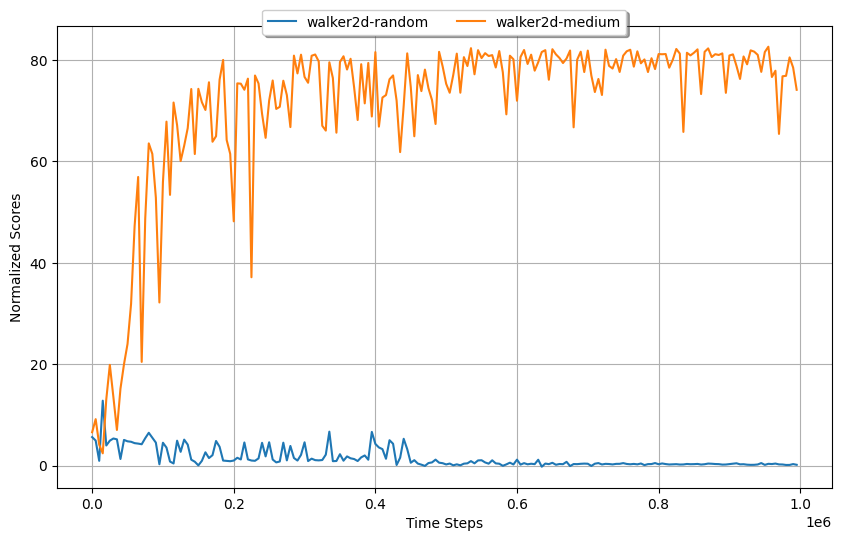

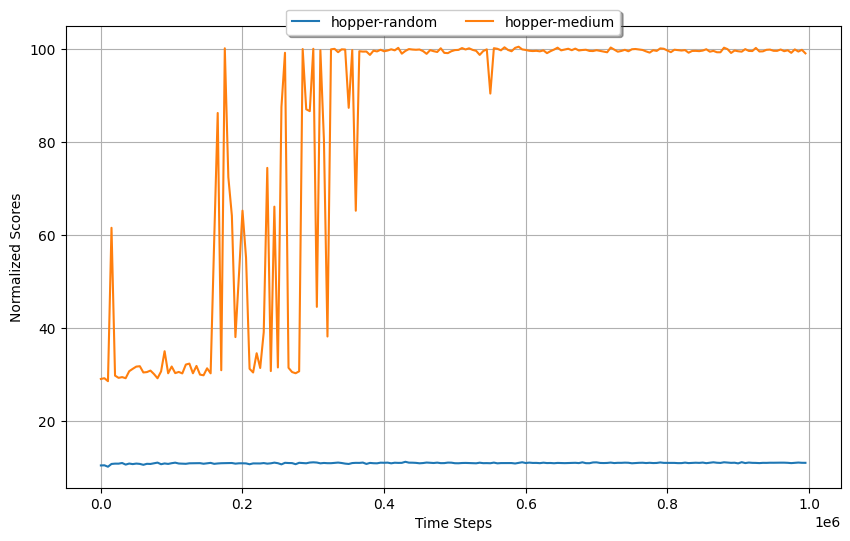

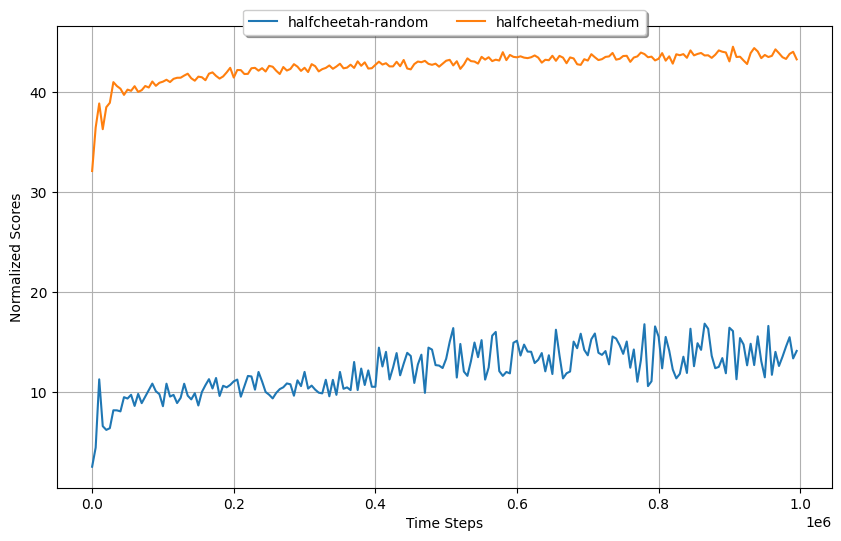

In [5]:
from os import walk
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Note finished @ hopper medium expert
num_eval_per_scenario = 3

w = walk("./results")
files = next(w)[2]
files.sort(reverse=True)

tests = []
for filename in files:
    test_name = '-'.join(filename.split("_")[2].split('-')[:2])
    tests.append((test_name, np.load(Path('./results', filename))))

total_timesteps = 1000000
evaluation_frequency = 5000

for i, test in enumerate(tests):
    if i % num_eval_per_scenario == 0:
        plt.figure(figsize=(10, 6))
    
    i = i+1
    # Calculate the number of evaluation points based on the data shape
    name, data = test
    num_evaluations = len(data)

    # Create a vector for the x-axis representing the time steps
    x = np.arange(0, total_timesteps, evaluation_frequency)[:num_evaluations]

    # Plot the D4RL benchmarks
    plt.plot(x, data, label=name)
    
    if i % num_eval_per_scenario == 0:
        plt.legend(
            loc='upper center',
            bbox_to_anchor=(0.5, 1.05),
            ncol=num_eval_per_scenario,
            fancybox=True,
            shadow=True
        )
        plt.xlabel("Time Steps")
        plt.ylabel("Normalized Scores")
        plt.grid(True)
